### Importing Libararies

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df=pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\movies.csv")
df

,id,title,releaseDate,rating,genres,description,duration,tagline,metascore,metascore_count,metascore_sentiment,userscore,userscore_count,userscore_sentiment,production_companies,director,writer,top_cast
0,2000545497,Dekalog (1988),1996-03-22,TV-MA,Drama,This masterwork by Krzysztof Kieślowski is one...,572,NaN,100.0,13,Universal acclaim,78.0,162.0,Generally favorable,"Telewizja Polska (TVP),Zespol Filmowy ""Tor"",Se...",Krzysztof Kieslowski,"Krzysztof Kieslowski,Krzysztof Piesiewicz","Artur Barcis,Olgierd Lukaszewicz,Olaf Lubaszen..."
1,2000521589,The Leopard (re-release),2004-08-13,PG,"Drama,History","Set in Sicily in 1860, Luchino Visconti's spec...",187,Luchino Visconti's Enduring Romantic Adventure,100.0,12,Universal acclaim,79.0,99.0,Generally favorable,"Titanus,Société Nouvelle Pathé Cinéma,Société ...",Luchino Visconti,"Giuseppe Tomasi di Lampedusa,Suso Cecchi D'Ami...","Burt Lancaster,Alain Delon,Claudia Cardinale,P..."
2,2000548059,Rear Window,1954-09-01,TV-PG,"Drama,Mystery,Thriller",A wheelchair-bound photographer spies on his n...,112,In deadly danger...because they saw too much!,100.0,18,Universal acclaim,87.0,626.0,Universal acclaim,"Alfred J. Hitchcock Productions,Paramount Pict...",Alfred Hitchcock,"John Michael Hayes,Cornell Woolrich","James Stewart,Grace Kelly,Wendell Corey,Thelma..."
3,2000542176,Boyhood,2014-07-11,TV-14,Drama,"Filmed over 12 years with the same cast, Richa...",165,12 years in the making,100.0,50,Universal acclaim,76.0,2650.0,Generally favorable,"IFC Productions,Detour Filmproduction,IFC Film...",Richard Linklater,Richard Linklater,"Ellar Coltrane,Patricia Arquette,Ethan Hawke,E..."
4,2000545507,Three Colors: Red,1994-11-23,R,"Drama,Mystery,Romance",Krzysztof Kieslowski closes his Three Colors t...,99,NaN,100.0,11,Universal acclaim,83.0,270.0,Universal acclaim,"MK2 Productions,France 3 Cinéma,CAB Production...",Krzysztof Kieslowski,"Krzysztof Kieslowski,Krzysztof Piesiewicz,Agni...","Irène Jacob,Jean-Louis Trintignant,Frédérique ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16535,2000538586,Afghan Stories,2003-04-30,NaN,Documentary,"Horrified by the 9/11 attacks on America, film...",60,NaN,NaN,7,NaN,0.0,1.0,NaN,"Wicklow Films,Vanguard Cinema,Seventh Art Rele...",Taran Davies,Taran Davies,NaN
16536,2000538890,Saint Misbehavin': The Wavy Gravy Movie,2010-12-10,Not Rated,Documentary,"Beginning with Woodstock ‘99, director Michell...",87,NaN,NaN,7,NaN,0.0,1.0,NaN,Argot Pictures,Michelle Esrick,NaN,"Larry Brilliant,Wavy Gravy,Enzio Marchello"
16537,2000538606,The Burning Wall,2002-11-20,Unrated,Documentary,Documentary that examines life and dissent in ...,115,NaN,NaN,8,NaN,0.0,0.0,NaN,NaN,Hava Kohav Beller,Hava Kohav Beller,"Konrad Adenauer,Günter Bazyli,Wolf Biermann,Be..."
16538,2000538599,Boys to Men,2001-04-27,NaN,Drama,Compilation of 4 short films from different di...,75,NaN,NaN,8,NaN,0.0,1.0,NaN,Jour de Fête Films,NaN,NaN,"Ema Tuennerman,Brett Chukerman,Weston Mueller,..."


### Missing Values

In [3]:
df.isnull().sum()

id                         0
title                      0
releaseDate                0
rating                  1556
genres                     5
description                0
duration                   0
tagline                 4757
metascore                 10
metascore_count            0
metascore_sentiment       10
userscore                  1
userscore_count            1
userscore_sentiment     3600
production_companies      19
director                  10
writer                   965
top_cast                 153
dtype: int64

### Data Imputation

In [4]:
df['rating']=df['rating'].fillna('Not Rated')

In [5]:
df['rating'].value_counts()

rating
R            5005
Not Rated    3900
PG-13        2561
PG           1230
TV-14        1172
TV-MA         729
Unrated       671
TV-PG         558
TV-G          172
G             164
Passed        143
Approved      136
TV-Y           21
TV-Y7          20
GP             14
TV-Y7-FV        9
16+             9
M               8
18+             7
NC-17           4
13+             2
M/PG            2
12              2
MA-17           1
Name: count, dtype: int64

In [6]:
df=df.drop(['tagline','writer','top_cast'],axis=1)

In [7]:
df.columns

Index(['id', 'title', 'releaseDate', 'rating', 'genres', 'description',
       'duration', 'metascore', 'metascore_count', 'metascore_sentiment',
       'userscore', 'userscore_count', 'userscore_sentiment',
       'production_companies', 'director'],
      dtype='object')

### Sentiment Labels

In [8]:
import pandas as pd

# Define a function to map score → sentiment
def derive_user_sentiment(score):
    if pd.isna(score):
        return 'Neutral'  # handle missing values gracefully
    elif score >= 70.0:
        return 'Positive'
    elif score <= 39.0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply function to create sentiment column
df['userscore_sentiment'] = df['userscore'].apply(derive_user_sentiment)


In [9]:
df.isnull().sum()

id                       0
title                    0
releaseDate              0
rating                   0
genres                   5
description              0
duration                 0
metascore               10
metascore_count          0
metascore_sentiment     10
userscore                1
userscore_count          1
userscore_sentiment      0
production_companies    19
director                10
dtype: int64

In [10]:
df['userscore_sentiment'].value_counts()

userscore_sentiment
Neutral     7375
Positive    5102
Negative    4063
Name: count, dtype: int64

In [11]:
df.head()

,id,title,releaseDate,rating,genres,description,duration,metascore,metascore_count,metascore_sentiment,userscore,userscore_count,userscore_sentiment,production_companies,director
0,2000545497,Dekalog (1988),1996-03-22,TV-MA,Drama,This masterwork by Krzysztof Kieślowski is one...,572,100.0,13,Universal acclaim,78.0,162.0,Positive,"Telewizja Polska (TVP),Zespol Filmowy ""Tor"",Se...",Krzysztof Kieslowski
1,2000521589,The Leopard (re-release),2004-08-13,PG,"Drama,History","Set in Sicily in 1860, Luchino Visconti's spec...",187,100.0,12,Universal acclaim,79.0,99.0,Positive,"Titanus,Société Nouvelle Pathé Cinéma,Société ...",Luchino Visconti
2,2000548059,Rear Window,1954-09-01,TV-PG,"Drama,Mystery,Thriller",A wheelchair-bound photographer spies on his n...,112,100.0,18,Universal acclaim,87.0,626.0,Positive,"Alfred J. Hitchcock Productions,Paramount Pict...",Alfred Hitchcock
3,2000542176,Boyhood,2014-07-11,TV-14,Drama,"Filmed over 12 years with the same cast, Richa...",165,100.0,50,Universal acclaim,76.0,2650.0,Positive,"IFC Productions,Detour Filmproduction,IFC Film...",Richard Linklater
4,2000545507,Three Colors: Red,1994-11-23,R,"Drama,Mystery,Romance",Krzysztof Kieslowski closes his Three Colors t...,99,100.0,11,Universal acclaim,83.0,270.0,Positive,"MK2 Productions,France 3 Cinéma,CAB Production...",Krzysztof Kieslowski


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16540 entries, 0 to 16539
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    16540 non-null  int64  
 1   title                 16540 non-null  object 
 2   releaseDate           16540 non-null  object 
 3   rating                16540 non-null  object 
 4   genres                16535 non-null  object 
 5   description           16540 non-null  object 
 6   duration              16540 non-null  int64  
 7   metascore             16530 non-null  float64
 8   metascore_count       16540 non-null  int64  
 9   metascore_sentiment   16530 non-null  object 
 10  userscore             16539 non-null  float64
 11  userscore_count       16539 non-null  float64
 12  userscore_sentiment   16540 non-null  object 
 13  production_companies  16521 non-null  object 
 14  director              16530 non-null  object 
dtypes: float64(3), int6

In [13]:
df.isnull().sum()

id                       0
title                    0
releaseDate              0
rating                   0
genres                   5
description              0
duration                 0
metascore               10
metascore_count          0
metascore_sentiment     10
userscore                1
userscore_count          1
userscore_sentiment      0
production_companies    19
director                10
dtype: int64

In [14]:
# Fill missing metascore with its mode (most frequent value)
df['metascore_sentiment'] = df['metascore_sentiment'].fillna(df['metascore_sentiment'].mode()[0])


In [15]:
# Fill all object (string) columns with 'Unknown'
df = df.fillna(
    {col: 'Unknown' for col in df.select_dtypes(include='object').columns}
)


In [16]:
fill_median = ['metascore', 'userscore', 'userscore_count']
for col in fill_median:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

In [17]:
df.head()

,id,title,releaseDate,rating,genres,description,duration,metascore,metascore_count,metascore_sentiment,userscore,userscore_count,userscore_sentiment,production_companies,director
0,2000545497,Dekalog (1988),1996-03-22,TV-MA,Drama,This masterwork by Krzysztof Kieślowski is one...,572,100.0,13,Universal acclaim,78.0,162.0,Positive,"Telewizja Polska (TVP),Zespol Filmowy ""Tor"",Se...",Krzysztof Kieslowski
1,2000521589,The Leopard (re-release),2004-08-13,PG,"Drama,History","Set in Sicily in 1860, Luchino Visconti's spec...",187,100.0,12,Universal acclaim,79.0,99.0,Positive,"Titanus,Société Nouvelle Pathé Cinéma,Société ...",Luchino Visconti
2,2000548059,Rear Window,1954-09-01,TV-PG,"Drama,Mystery,Thriller",A wheelchair-bound photographer spies on his n...,112,100.0,18,Universal acclaim,87.0,626.0,Positive,"Alfred J. Hitchcock Productions,Paramount Pict...",Alfred Hitchcock
3,2000542176,Boyhood,2014-07-11,TV-14,Drama,"Filmed over 12 years with the same cast, Richa...",165,100.0,50,Universal acclaim,76.0,2650.0,Positive,"IFC Productions,Detour Filmproduction,IFC Film...",Richard Linklater
4,2000545507,Three Colors: Red,1994-11-23,R,"Drama,Mystery,Romance",Krzysztof Kieslowski closes his Three Colors t...,99,100.0,11,Universal acclaim,83.0,270.0,Positive,"MK2 Productions,France 3 Cinéma,CAB Production...",Krzysztof Kieslowski


In [18]:
import os
print(os.getcwd())

c:\Users\hp\AppData\Local\Programs\Microsoft VS Code


### Download NLTK

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Import NLP Libraries

In [20]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [21]:
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Stop Words & Lemmatizer(NLP Preprocessing)

In [22]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()                        # Lowercase
    text = re.sub(r'<.*?>', '', text)               # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)            # Keep only letters
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens]   # Lemmatization
    return ' '.join(tokens)

df['clean_text'] = df['description'].apply(clean_text)

### Feature Extract(TD-IDF)

In [23]:
# Import TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create and fit TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # limiting to top 5000 features
text_features = tfidf.fit_transform(df['clean_text'])

# Convert to dense array for easier handling
text_features_dense = text_features.todense()

# Create a DataFrame with the features
feature_names = tfidf.get_feature_names_out()
text_features_df = pd.DataFrame(text_features_dense, columns=feature_names)

### Combine Text + Numeric values(Sentiment analysis)

In [ ]:
from scipy.sparse import hstack

num_cols = ['duration', 'metascore', 'userscore','metascore_count']


# Combine TF-IDF text + numeric directly
num_features = df[num_cols].values
X = hstack((text_features, num_features))   # TF-IDF is sparse; hstack keeps it efficient

y = df['userscore_sentiment']

print("Final feature shape:", X.shape)


Final feature shape: (16540, 5004)


### Split Train/Test

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Train Model (LR)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize model
lr = LogisticRegression(max_iter=1000)

# Train
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)


### Classification Report

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       813
     Neutral       1.00      1.00      1.00      1475
    Positive       1.00      1.00      1.00      1020

    accuracy                           1.00      3308
   macro avg       1.00      1.00      1.00      3308
weighted avg       1.00      1.00      1.00      3308



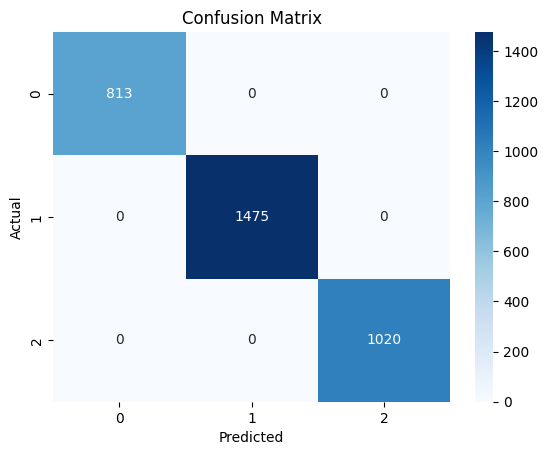

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Train Model (NB)

Naive Bayes Accuracy: 0.7379081015719468

               precision    recall  f1-score   support

    Negative       1.00      0.87      0.93       813
     Neutral       0.71      0.71      0.71      1475
    Positive       0.61      0.67      0.64      1020

    accuracy                           0.74      3308
   macro avg       0.77      0.75      0.76      3308
weighted avg       0.75      0.74      0.74      3308



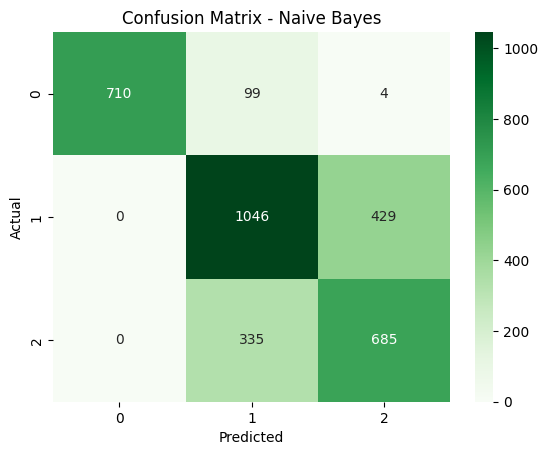

In [42]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\n", classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


### Train Model (SVC)

SVM Accuracy: 0.9495163240628779

               precision    recall  f1-score   support

    Negative       0.99      0.98      0.99       813
     Neutral       0.93      0.95      0.94      1475
    Positive       0.94      0.92      0.93      1020

    accuracy                           0.95      3308
   macro avg       0.95      0.95      0.95      3308
weighted avg       0.95      0.95      0.95      3308



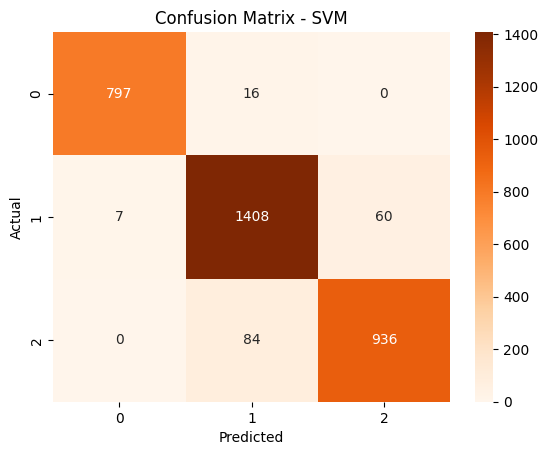

In [43]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\n", classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

### Compare Model

In [45]:
print("Model Comparison:")
print("Logistic Regression:", accuracy_score(y_test, y_pred))
print("SVM:", accuracy_score(y_test, y_pred_svm))
print("Naive Bayes:", accuracy_score(y_test, y_pred_nb))

Model Comparison:
Logistic Regression: 1.0
SVM: 0.9495163240628779
Naive Bayes: 0.7379081015719468
